In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("salaries.csv")
df.head()

,Years of Experience,Education Level,Age,Location Factor,Salary
0,29,1,49,7,124204
1,27,3,45,4,125948
2,20,4,41,8,116078
3,14,4,37,5,106486
4,20,3,42,7,113297


In [4]:
df.shape

(1000, 5)

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('Salary',axis=1)
y =df['Salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
model.score(X_test,y_test)

0.959406861351375

In [8]:
model.intercept_

52519.18303688658

In [9]:
model.coef_

array([2109.51761869, 5060.61877537, -120.2791406 , 1495.70225789])

In [10]:
## in this we see that the age feature has negative coeff

In [11]:
X_test[:1]

,Years of Experience,Education Level,Age,Location Factor
521,15,3,37,5


In [12]:
y_test[:1]

521    97186
Name: Salary, dtype: int64

In [13]:
model.predict(X_test[:1])

array([102371.98673052])

In [14]:
15*model.coef_[0] + 3*model.coef_[1] + 37*model.coef_[2] + 5*model.coef_[3] + model.intercept_

102371.98673051776

<Axes: >

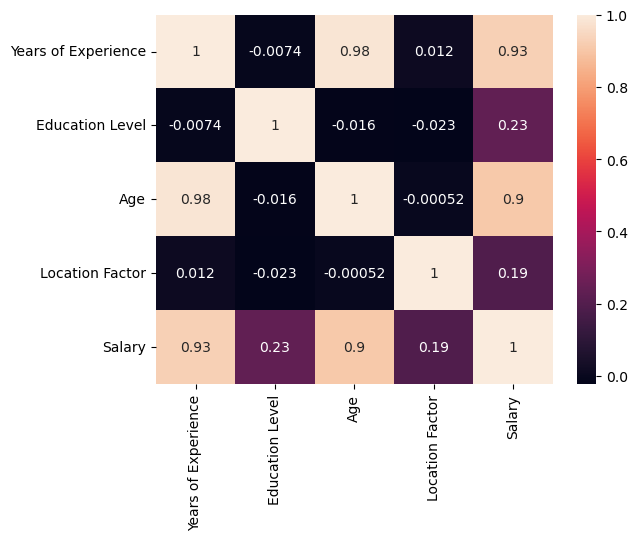

In [15]:
cm = df.corr()
sns.heatmap(cm,annot=True)

## using VIF variabel infaltion factor

In [16]:
! pip install statsmodels

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
def calulate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns 
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [25]:
X =df.drop('Salary',axis=1)

In [26]:
calulate_vif(X)

,Variable,VIF
0,Years of Experience,22.342087
1,Education Level,5.472969
2,Age,42.201149
3,Location Factor,4.289467


In [27]:
calulate_vif(X.drop("Age",axis=1))

,Variable,VIF
0,Years of Experience,3.198601
1,Education Level,3.509425
2,Location Factor,3.231181


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X.drop('Age',axis=1),y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.score(X_test,y_test)

0.9592314656682582

In [31]:
model.intercept_

49934.2406827449

In [32]:
model.coef_

array([1994.10983096, 5070.62814345, 1500.8453815 ])